# Your info

Full name: mohammd ali farahat

Student ID: 97521423

# Q1. Hopfield

## Q1.2

In [ ]:
# Q1.2_graded
# Do not change the above line.

# This cell is for your imports.

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Q1.2_graded
# Do not change the above line.

class Hopfield:
    def __init__(self, dim):
        # set dimension of network (number of nuerons)
        self.dim = dim
        # initialize weight matrix with zeros
        self.weights = np.zeros((dim, dim)).astype('int')

    def Save(self, input_list):
        # convert input to numpy array
        input_list = np.array(input_list)

        # create reverse of input
        input_list_r = input_list.reshape(-1,1)

        # calculate new weights that our input generates
        new_weights = input_list_r * input_list

        # remove diagonal of matrix
        np.fill_diagonal(new_weights, 0)

        # update our final weights matrix
        self.weights += new_weights
        print("updated weights by input: ", input_list, "is :\n", self.weights) 
 

    def CheckInput(self, input):
        # convert input to numpy array
        input = np.array(input)

        # calculate dot of input and weights matrix
        input_mult = np.dot(self.weights, input)

        # find sign of calculated data before
        input_sign = np.sign(input_mult)

        if ((input_sign == input).all()):
            print(input,"is STABLE")
        else:
            print(input, "is UNSTABLE, the nearest saved data is: ", input_sign)



 
if __name__=='__main__':
    hop = Hopfield(6)
    hop.Save([1,1,1,-1,-1,-1])
    hop.Save([1,-1,1,-1,1,-1])
    hop.CheckInput([1,1,1,-1,-1,-1])
    hop.CheckInput([1,-1,1,-1,1,-1])
    hop.CheckInput([-1,1,1,-1,-1,-1])


# This cell is for your codes.

updated weights by input:  [ 1  1  1 -1 -1 -1] is :
 [[ 0  1  1 -1 -1 -1]
 [ 1  0  1 -1 -1 -1]
 [ 1  1  0 -1 -1 -1]
 [-1 -1 -1  0  1  1]
 [-1 -1 -1  1  0  1]
 [-1 -1 -1  1  1  0]]
updated weights by input:  [ 1 -1  1 -1  1 -1] is :
 [[ 0  0  2 -2  0 -2]
 [ 0  0  0  0 -2  0]
 [ 2  0  0 -2  0 -2]
 [-2  0 -2  0  0  2]
 [ 0 -2  0  0  0  0]
 [-2  0 -2  2  0  0]]
[ 1  1  1 -1 -1 -1] is STABLE
[ 1 -1  1 -1  1 -1] is STABLE
[-1  1  1 -1 -1 -1] is UNSTABLE, the nearest saved data is:  [ 1  1  1 -1 -1 -1]


## Q1.3

In [ ]:
# Q1.3_graded
# Do not change the above line.
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFont, ImageFilter

!wget "https://www.freebestfonts.com/yone//down/arial.ttf"
!mv arial.ttf /usr/share/fonts/truetype

font_size = 64
font = ImageFont.truetype("arial.ttf", font_size)
# This cell is for your imports.


--2021-06-06 05:41:13--  https://www.freebestfonts.com/yone//down/arial.ttf
Resolving www.freebestfonts.com (www.freebestfonts.com)... 45.158.13.53
Connecting to www.freebestfonts.com (www.freebestfonts.com)|45.158.13.53|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 915212 (894K) [application/x-font-truetype]
Saving to: ‘arial.ttf’

arial.ttf           100%[===================>] 893.76K  87.8KB/s    in 7.5s    

2021-06-06 05:41:22 (119 KB/s) - ‘arial.ttf’ saved [915212/915212]



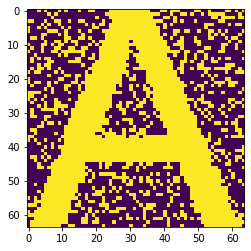

iteration:  0


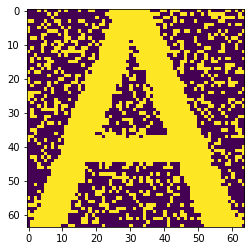

iteration:  1


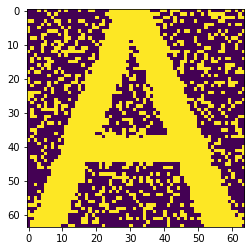

iteration:  2


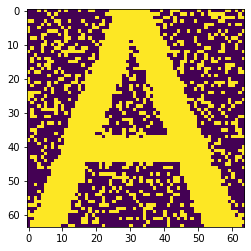

iteration:  3


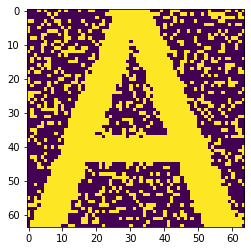

iteration:  4


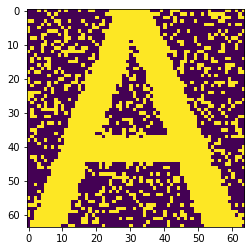

iteration:  5


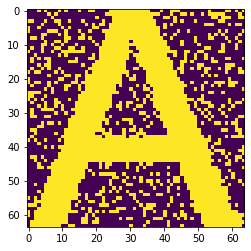

iteration:  6


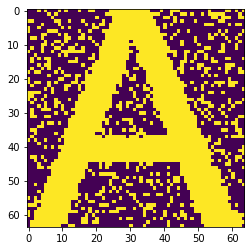

iteration:  7


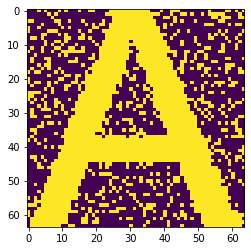

iteration:  8


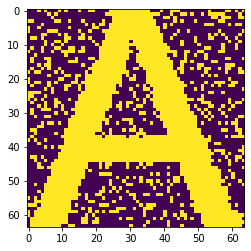

iteration:  9


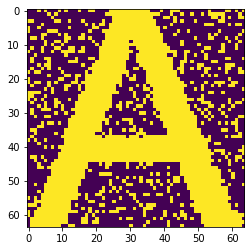

iteration:  10


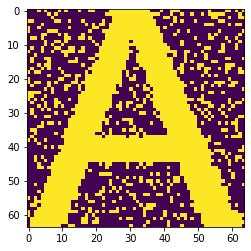

iteration:  11


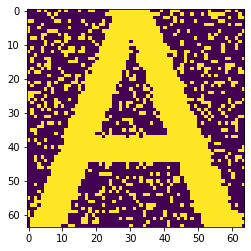

iteration:  12


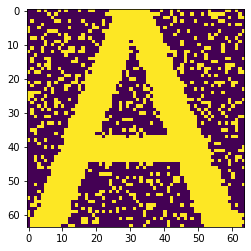

iteration:  13


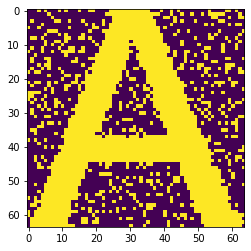

iteration:  14


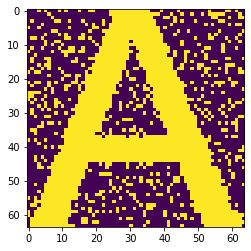

iteration:  15


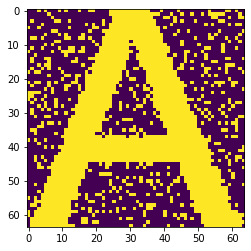

iteration:  16


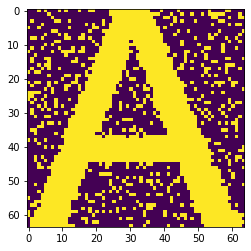

iteration:  17


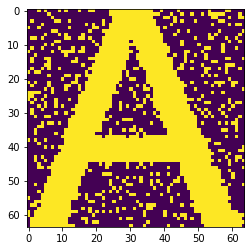

iteration:  18


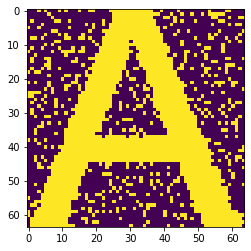

iteration:  19


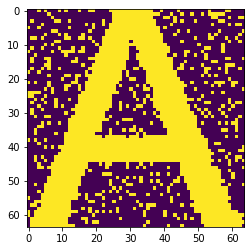

iteration:  20


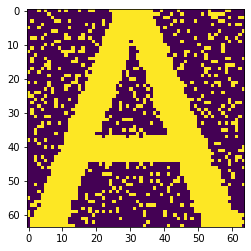

iteration:  21


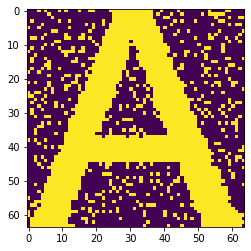

iteration:  22


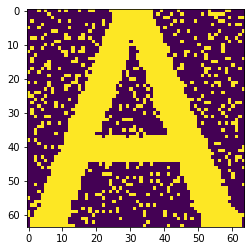

iteration:  23


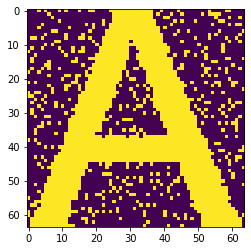

iteration:  24


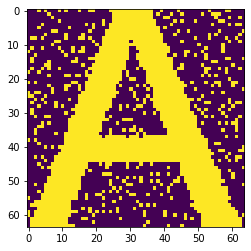

iteration:  25


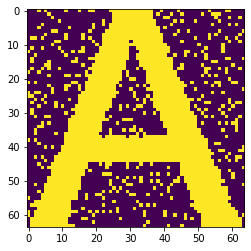

iteration:  26


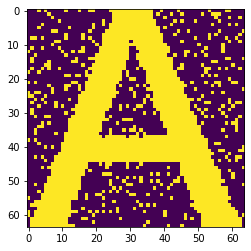

iteration:  27


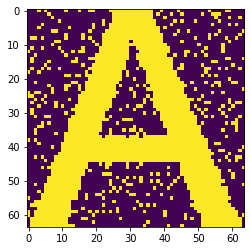

iteration:  28


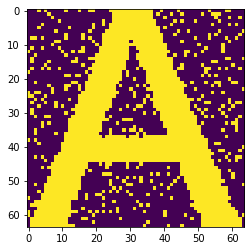

iteration:  29


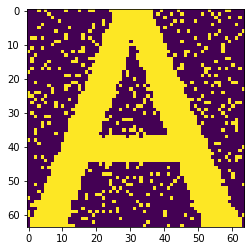

iteration:  30


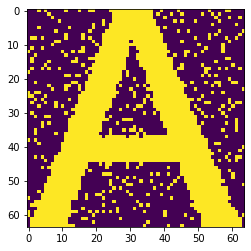

iteration:  31


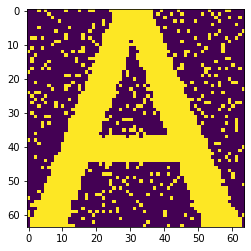

iteration:  32


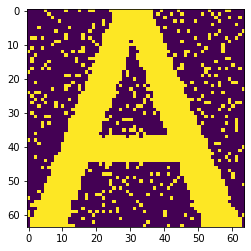

iteration:  33


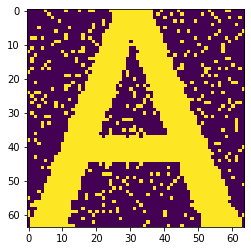

iteration:  34


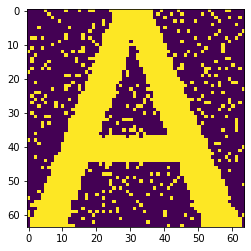

iteration:  35


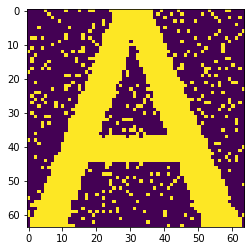

iteration:  36


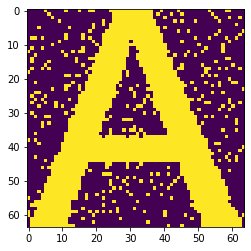

iteration:  37


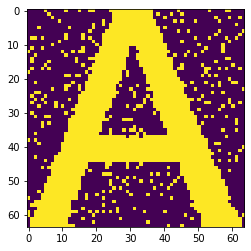

iteration:  38


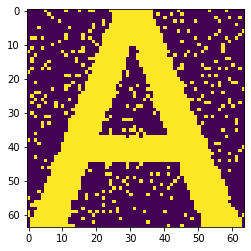

iteration:  39


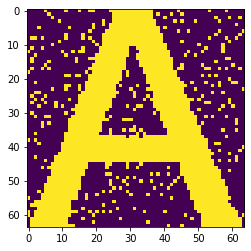

iteration:  40


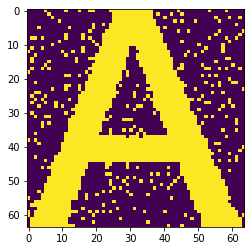

iteration:  41


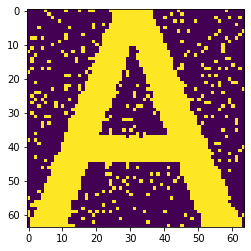

iteration:  42


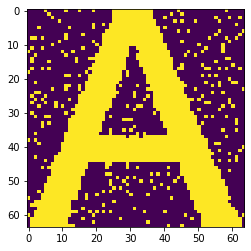

iteration:  43


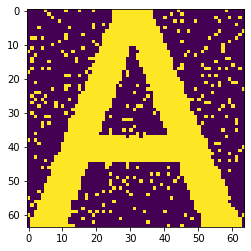

iteration:  44


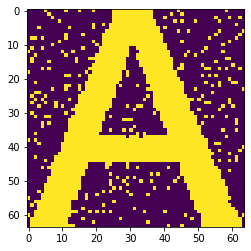

iteration:  45


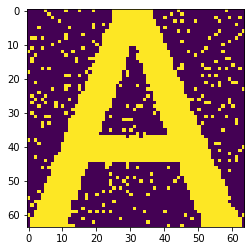

iteration:  46


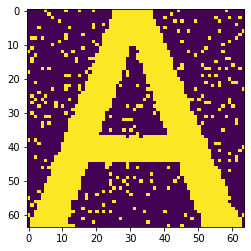

iteration:  47


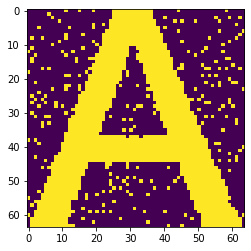

iteration:  48


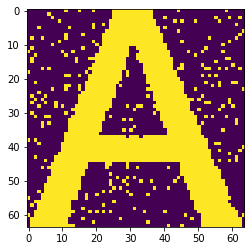

iteration:  49


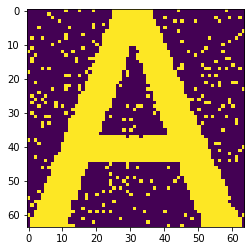

iteration:  50


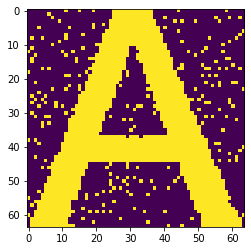

iteration:  51


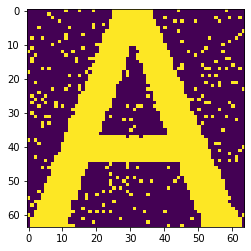

iteration:  52


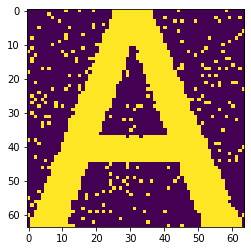

iteration:  53


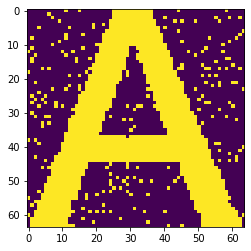

iteration:  54


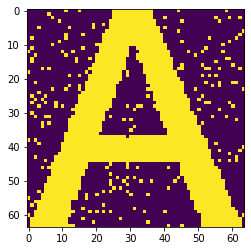

iteration:  55


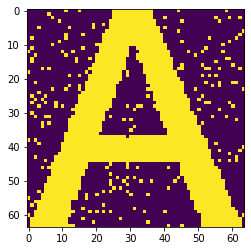

Network find an answer
result image is :


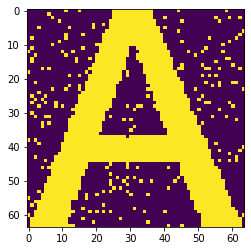

finished in: 55
ACC is:  0.94580078125


In [ ]:
# Q1.3_graded
# Do not change the above line.

# This cell is for your codes.



class Hopfield:
    def __init__(self, dim, input_patterns):
        # set dimension of network (number of nuerons)
        self.dim = dim
        # initialize weight matrix with zeros
        self.weights = np.zeros((dim, dim))
        self.count = 0
        self.input_patterns = input_patterns

    def Save(self):

        for i in range(len(self.input_patterns)):
            input_list = self.input_patterns[i]
            input_list = np.array(input_list)

            # create reverse of input
            input_list_r = input_list.reshape(-1,1)

            # calculate new weights that our input generates
            new_weights = input_list_r * input_list

            # remove diagonal of matrix
            np.fill_diagonal(new_weights, 0)

            self.weights += new_weights

        # update our final weights matrix
        self.weights = np.divide(self.weights, self.dim)
        # print("updated weights by input: ", input_list, "is :\n", self.weights) 
 

    def CheckInput(self, input, i=10):
        
        input = np.array(input)
        e = self.energy(input)
        
        for j in range(i):
            idx = np.random.randint(input.size)
            input = self.update_async(input, idx)
        
        show_image(input)

        new_e = self.energy(input)
        
        if new_e == e:
            print('Network find an answer')
            print("result image is :")
            show_image(input)
            return input,-1

        return input,1
       

    def update_async(self, input, idx=None):

        if idx==None:
            new_input = np.matmul(self.weights,input)
            new_input[new_input < 0] = -1
            new_input[new_input > 0] = 1
            new_input[new_input == 0] = input[new_input == 0]
            input = new_input
        else:
            new_input = np.matmul(self.weights[idx],input)
            if new_input < 0:
                input[idx] = -1
            elif new_input > 0:
                input[idx] = 1
        return input

    def energy(self,input):
        e = -0.5*np.matmul(np.matmul(input.T,self.weights),input)
        return e



def cal_acc(input, expected):
    mistakes = 0
    for i in range(font_size * font_size):
        if expected[i] != input[i]:
            mistakes += 1
    return 1 - (mistakes/(font_size * font_size))


def add_noise(image, percentage):
    gauss = np.random.normal(0,percentage,font_size*font_size)
    gauss = gauss.reshape(font_size,font_size)
    return image + gauss


def image_to_array(image):
    I = np.array(image).astype('int')
    I[I <= 30] = -1
    I[I > 30] = 1
    input_font = I.reshape(1,-1)
    return input_font

def show_image(input_array):
    x = input_array.copy().reshape(font_size,font_size)
    x[x == 1] = 255
    x[x == -1] = 0
    im = Image.fromarray(np.uint8(x), 'L')
    plt.imshow(im)
    plt.show()
    return


if __name__=='__main__':

    font_patterns = []
    noisy10 = []
    noisy30 = []
    noisy60 = []

    for char in "ABCDEFGHIJ":
        im = Image.Image()._new(font.getmask(char))
        im = im.resize((font_size,font_size))

        noisy10.append(add_noise(im, 10))
        noisy30.append(add_noise(im, 30))
        noisy60.append(add_noise(im, 60))
        
        input_font = image_to_array(im)
        font_patterns.append(input_font)


    hop = Hopfield(font_size*font_size, font_patterns)
    hop.Save()


    img_num = 0
    xx = image_to_array(noisy60[img_num])[0]
    # xx = font_patterns[8][0]

    show_image(xx)
    for i in range(1000):
        print("iteration: ", i)
        # xxx = int(2000/(i+1)) + 5
        xx,tamam = hop.CheckInput(xx, i = 100)
        if (tamam == -1):
            print("finished in:",i)
            print("ACC is: ", cal_acc(xx, font_patterns[img_num][0]))
            break



# <font color='red'>Submission</font>

1. Sign up in [Gradescope](https://www.gradescope.com) with proper name and student ID and use the following code to join the class: <font color='green'>**D5372R**</font>
2. Fill in your full name (seperated by single spaces) and student ID in the beginning of this notebook.
3. After you're done with this notebook, you should do the following:
  - Clear all outputs of the notebook.
  ![clear all outputs](https://i.ibb.co/y6FrttB/Screen-Shot-2021-03-21-at-01-51-42.png)
  - Run all of the cells (if you skipped a question just leave the cell unchanged), and make sure all of your outputs are correct.
  ![run all](https://i.ibb.co/cgRcBZ0/Screen-Shot-2021-03-21-at-01-54-58.png)
  - Save your notebook.
  - If you're using Colab, download your notebook.
  ![download ipynb](https://i.ibb.co/2KxYM6K/Screen-Shot-2021-03-21-at-02-03-50.png)
  - Put the notebook file you just downloaded and `convert.py` in the same folder run the following command:
  ```bash
  python convert.py
  ```
  This will export your code for each question into a `.py` file.
    - **Note**: if you want to add more cells, add this to the **first** line of the cell:
  ```python
  # Q5_graded
  ```
  according to the question number.
  - There are 2 assignments in Gradescope:

    ![assignments](https://i.ibb.co/10GMhGM/Screen-Shot-2021-03-21-at-02-16-25.png)
  
    You should upload your **codes** and your **notebook** in `HW3` section and your final report for all of the questions as a **single pdf** file in `HW3 - Report`. Autograder will automatically check for:
    - `CI992_HW3.ipynb`
    - `Q1.2.py`
    - `Q1.3.py`
    - `inverted_pendulum.fcl`
    - Your name and ID in the beginning of `.ipynb` file.

    It is important that you <font color='red'>**don't**</font> change the names of these files before submission.

4. If you pass the autograder, you're good to go.